w₀: -5.30
w₁: 1.18

Передбачення:
2 годин: ймовірність здачі = 0.05, клас = 0
5 годин: ймовірність здачі = 0.64, клас = 1
7 годин: ймовірність здачі = 0.95, клас = 1


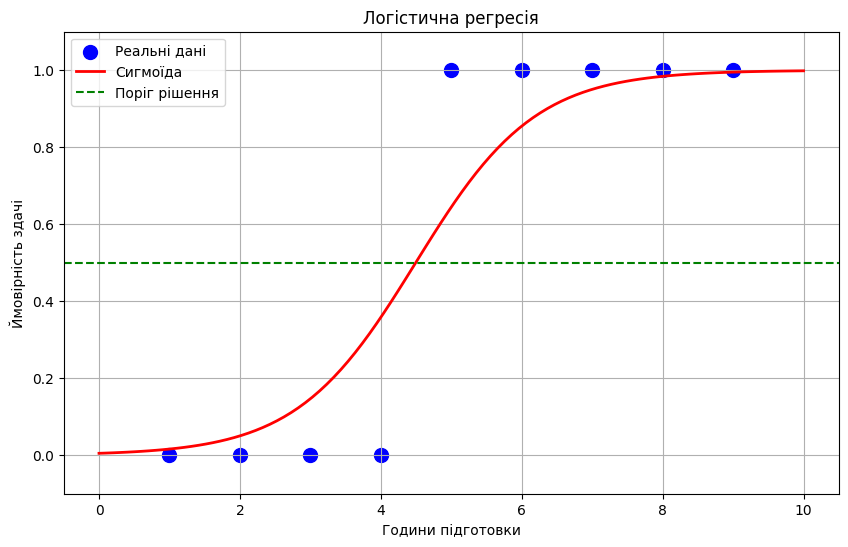

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Дані
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
passed = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

# Створюємо та навчаємо модель
model = LogisticRegression()
model.fit(hours, passed)

# Параметри
print(f"w₀: {model.intercept_[0]:.2f}")
print(f"w₁: {model.coef_[0][0]:.2f}")

# Передбачення ймовірностей
hours_range = np.linspace(0, 10, 100).reshape(-1, 1)
probabilities = model.predict_proba(hours_range)[:, 1]

# Передбачення для конкретних випадків
test_hours = np.array([[2], [5], [7]])
predictions = model.predict(test_hours)
probs = model.predict_proba(test_hours)[:, 1]

print("\nПередбачення:")
for h, pred, prob in zip(test_hours.flatten(), predictions, probs):
    print(f"{h} годин: ймовірність здачі = {prob:.2f}, клас = {pred}")

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(hours, passed, color='blue', s=100, label='Реальні дані')
plt.plot(hours_range, probabilities, color='red', linewidth=2, label='Сигмоїда')
plt.axhline(y=0.5, color='green', linestyle='--', label='Поріг рішення')
plt.xlabel('Години підготовки')
plt.ylabel('Ймовірність здачі')
plt.title('Логістична регресія')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.show()